In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
file_path = "/Users/gyan/Documents/Knowledge Discovery and Data Mining/CSV Files/breast-cancer-wisconsin.csv"
df = pd.read_csv(file_path)

# Displaying first few rows
print(df.head())

/Users/gyan/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


    Sample  F1  F2  F3  F4  F5  F6  F7  F8  F9  Class
0  1000025   5   1   1   1   2   1   3   1   1      2
1  1002945   5   4   4   5   7  10   3   2   1      2
2  1015425   3   1   1   1   2   2   3   1   1      2
3  1016277   6   8   8   1   3   4   3   7   1      2
4  1017023   4   1   1   3   2   1   3   1   1      2


In [3]:
# Summarizing each column
df.describe()

,Sample,F1,F2,F3,F4,F5,F7,F8,F9,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
# Replacing "?" with NaN 
df.replace('?', np.nan, inplace=True)

# Converting all numeric columns to proper data type excluding 'Sample'
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)  

missing_values = df.isna().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64


In [5]:
df.fillna(df.mean(), inplace=True)

# Confirming that missing values are handled
print("\nMissing Values After Replacement:\n", df.isna().sum())


Missing Values After Replacement:
 Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64


/var/folders/d6/848xvl9j4n5b8dzx9yrm176c0000gn/T/ipykernel_73402/2300112500.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(df.mean(), inplace=True)


In [6]:
print("\nFrequency Table: Class vs F6")
print(pd.crosstab(df['Class'], df['F6']))


Frequency Table: Class vs F6
F6     1.000000   2.000000   3.000000   3.544656   4.000000   5.000000   \
Class                                                                     
2            387         21         14         14          6         10   
4             15          9         14          2         13         20   

F6     6.000000   7.000000   8.000000   9.000000   10.000000  
Class                                                         
2              0          1          2          0          3  
4              4          7         19          9        129  


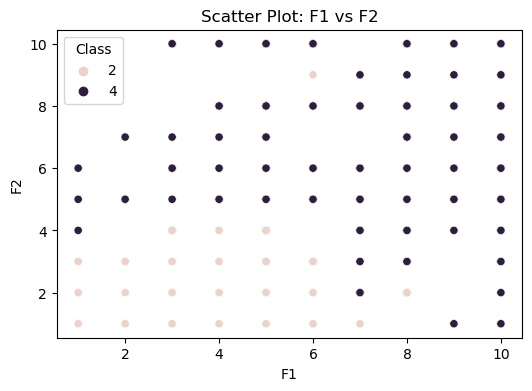

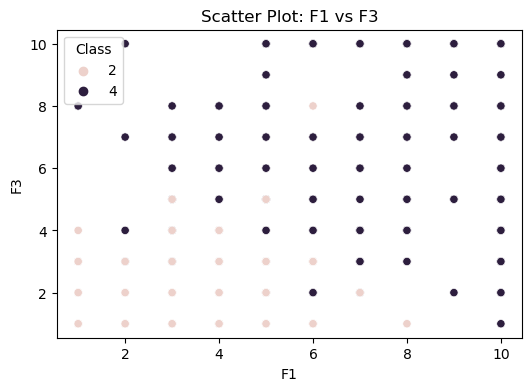

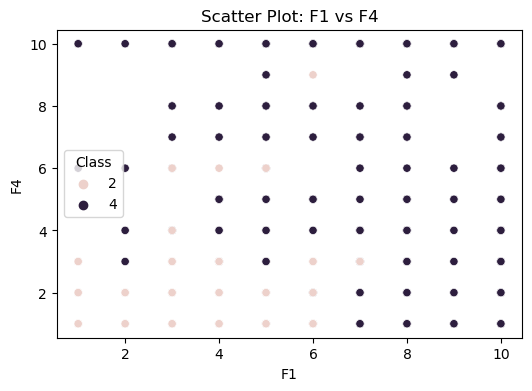

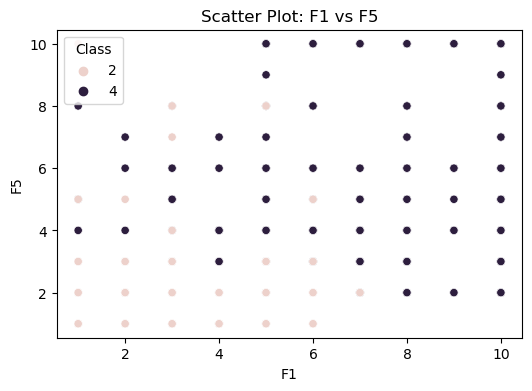

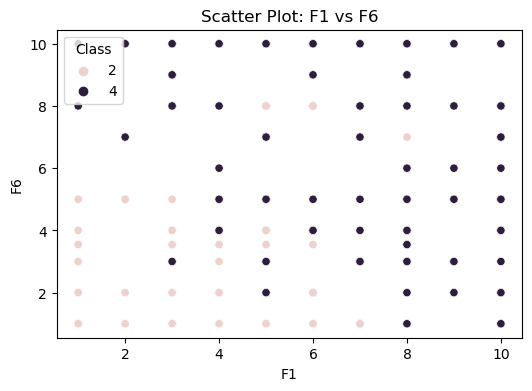

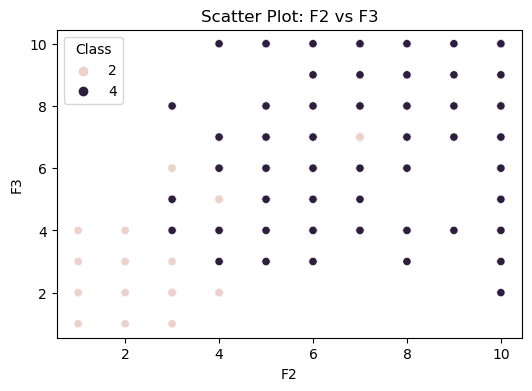

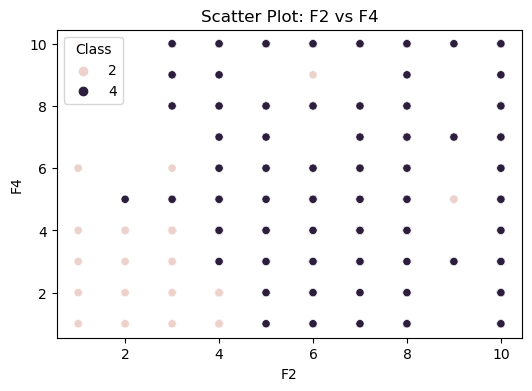

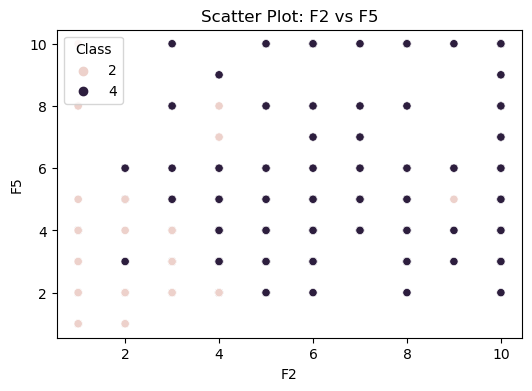

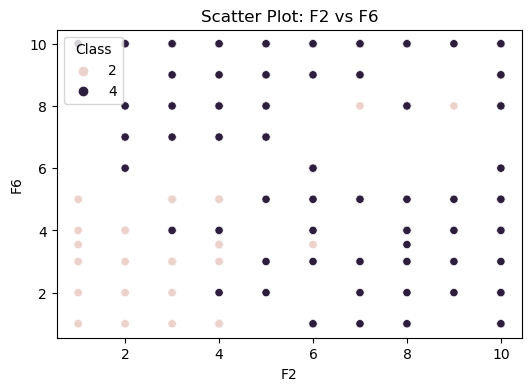

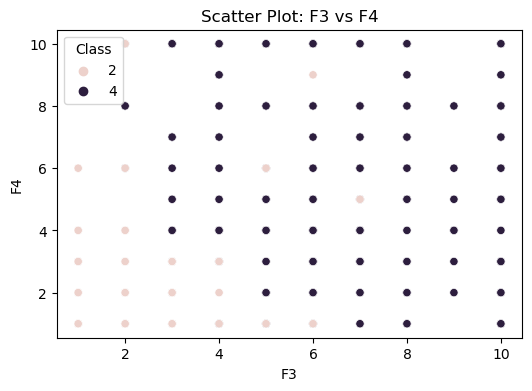

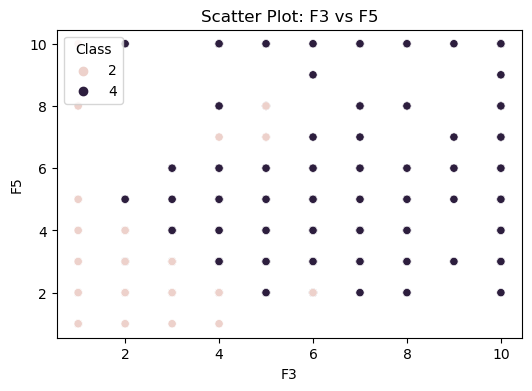

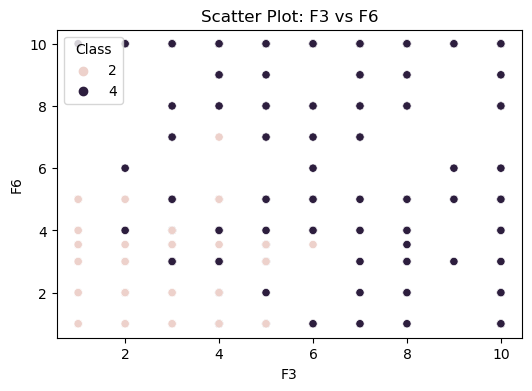

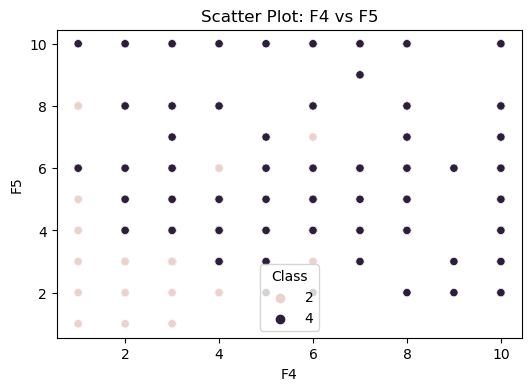

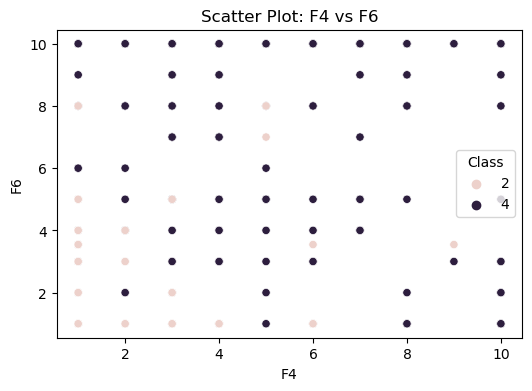

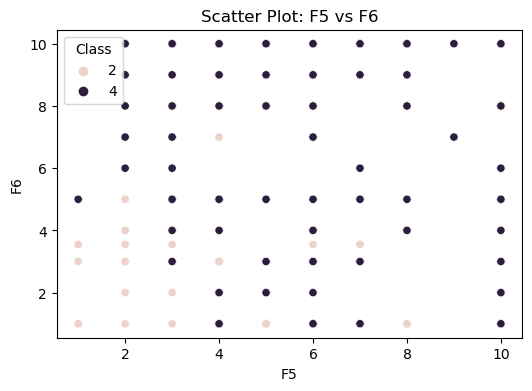

In [7]:
columns_plot = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']

# Scatter plots for each pair of F1 to F6
for i in range(len(columns_plot)):
    for j in range(i + 1, len(columns_plot)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[columns_plot[i]], y=df[columns_plot[j]], hue=df['Class'])
        plt.xlabel(columns_plot[i])
        plt.ylabel(columns_plot[j])
        plt.title(f'Scatter Plot: {columns_plot[i]} vs {columns_plot[j]}')
        plt.show()

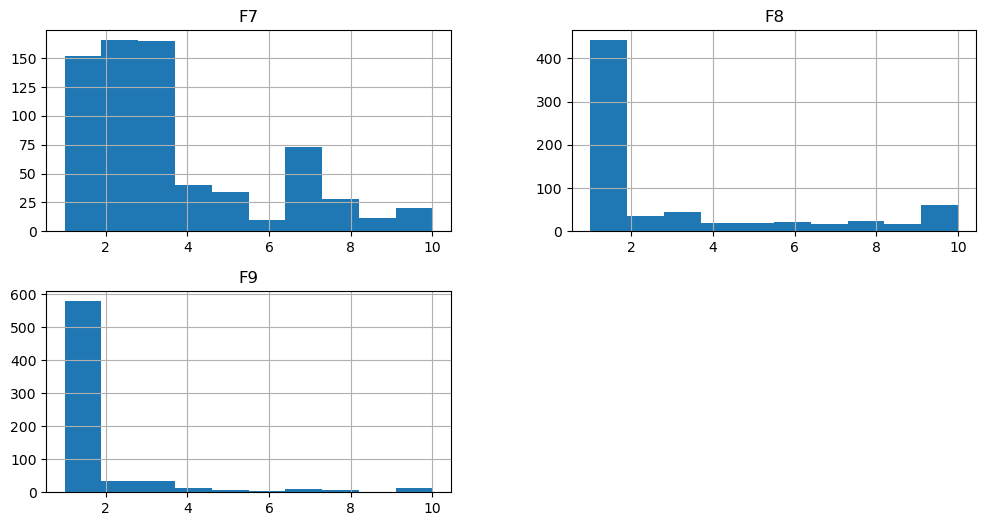

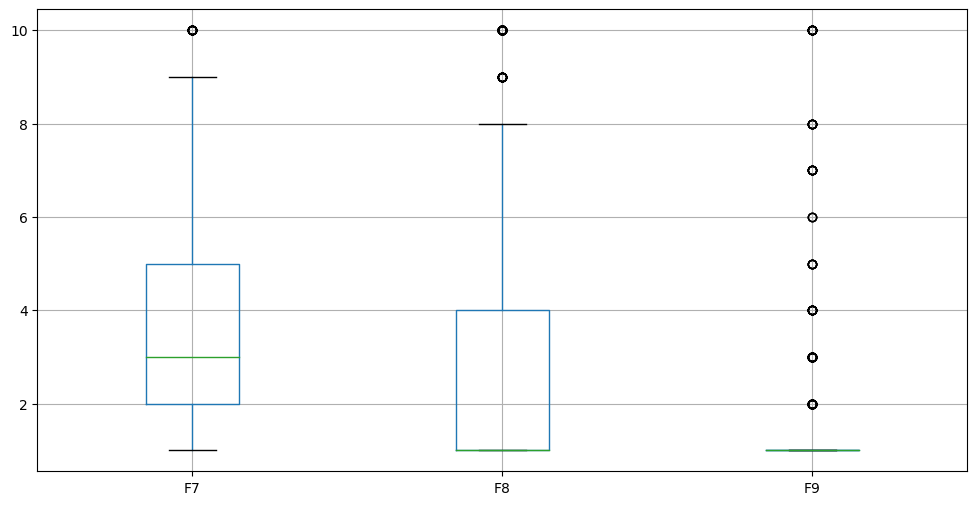

In [8]:
# Histograms for F7 to F9
df[['F7', 'F8', 'F9']].hist(figsize=(12, 6), bins=10)
plt.show()

# Boxplots for F7 to F9
plt.figure(figsize=(12, 6))
df[['F7', 'F8', 'F9']].boxplot()
plt.show()

In [9]:
# Deleting existing df to clear memory
del df

# Reloading dataset
df = pd.read_csv("/Users/gyan/Documents/Knowledge Discovery and Data Mining/CSV Files/breast-cancer-wisconsin.csv", dtype=str)

# Identify missing values 
df.replace('?', np.nan, inplace=True)  
missing_values_before = df.isna().sum()
print("Missing Values Before:\n", missing_values_before)

Missing Values Before:
 Sample     0
F1         0
F2         0
F3         0
F4         0
F5         0
F6        16
F7         0
F8         0
F9         0
Class      0
dtype: int64


In [10]:
# Convert all columns (except 'Sample') to numeric
df = df.apply(pd.to_numeric, errors='ignore')

# Remove rows with missing values
df.dropna(inplace=True)



/var/folders/d6/848xvl9j4n5b8dzx9yrm176c0000gn/T/ipykernel_73402/4217122269.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [11]:
# Verify missing values are removed
print("Missing Values after removal:")
print(df.isnull().sum())

Missing Values after removal:
Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64
